# My first notebook

In [1]:
print("Hello, world from python notebook")

Hello, world from python notebook


(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
(442,)
(442, 1)


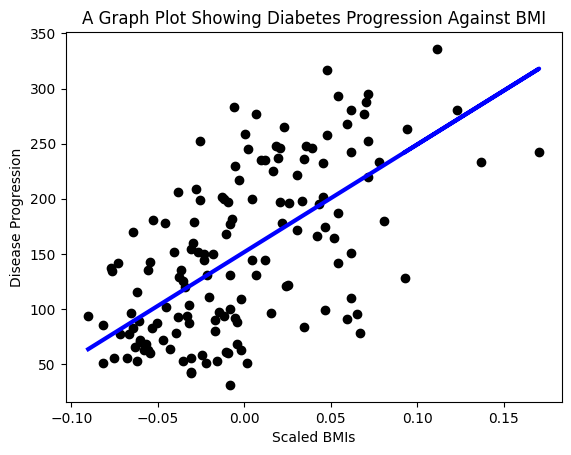

In [ ]:
import matplotlib.pyplot as  plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

#load diabetes dataset
X, Y = datasets.load_diabetes(return_X_y=True)

#print the shape of the data and the first row
print(X.shape)
print(X[0])


#Extract the column at index 2
X = X[:, 2]
print(X.shape)
X = X.reshape((-1,1))
print(X.shape)

#split the model into training and testing data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size=0.33)
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)


#predict using our test data
Y_pred= model.predict(X_test)


#how good are our predictions ? let's use mathlib to find out.

#create a scatter plot
plt.scatter(X_test, Y_test, color='black')

# plot the predictions
plt.plot(X_test,Y_pred, color='blue', linewidth=3)

#add labels and subtitles
plt.xlabel('Scaled BMIs')
plt.ylabel('Disease Progression')
plt.title('A Graph Plot Showing Diabetes Progression Against BMI')

#draw the plot
plt.show()






Let's try another column.Available columns are: 

        age age in years

        sex

        bmi body mass index

        bp average blood pressure

        s1 tc, total serum cholesterol

        s2 ldl, low-density lipoproteins

        s3 hdl, high-density lipoproteins

        s4 tch, total cholesterol / HDL

        s5 ltg, possibly log of serum triglycerides level

        s6 glu, blood sugar level



(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
(442,)
(442, 1)


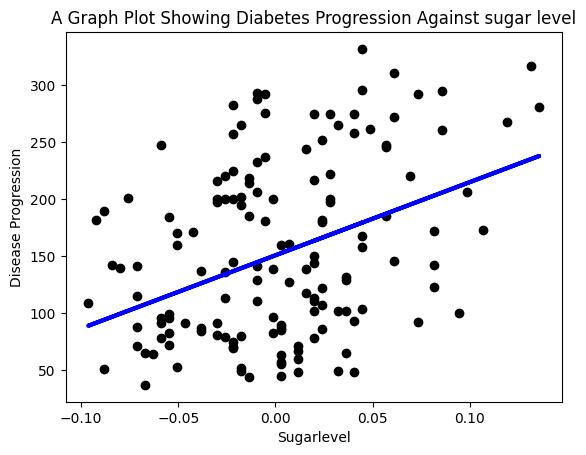

In [18]:
import matplotlib.pyplot as  plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

#load diabetes dataset
X, Y = datasets.load_diabetes(return_X_y=True)

#print the shape of the data and the first row
print(X.shape)
print(X[0])


#Extract the column at index 2
X = X[:,9]
print(X.shape)
X = X.reshape((-1,1))
print(X.shape)

#split the model into training and testing data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size=0.33)
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)


#predict using our test data
Y_pred= model.predict(X_test)


#how good are our predictions ? let's use mathlib to find out.

#create a scatter plot
plt.scatter(X_test, Y_test, color='black')

# plot the predictions
plt.plot(X_test,Y_pred, color='blue', linewidth=3)

#add labels and subtitles
plt.xlabel('Sugarlevel')
plt.ylabel('Disease Progression')
plt.title('A Graph Plot Showing Diabetes Progression Against sugar level')

#draw the plot
plt.show()


Assignment

(20, 3)
[  5. 162.  60.]
(20, 3)
[191.  36.  50.]
(20,)
(20, 1)
(20,)
(20, 1)


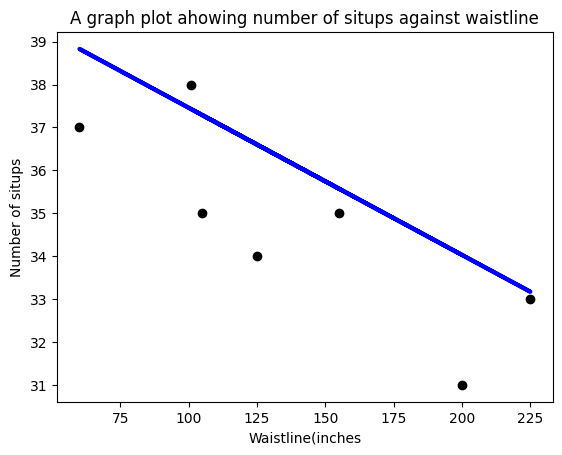

In [17]:
import matplotlib.pyplot as  plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

#load diabetes dataset
X, Y = datasets.load_linnerud(return_X_y=True)

#print the shape of the data and the first row
print(X.shape)
print(X[0])


print(Y.shape)
print(Y[0])



#Extract the phys  column at index 1
X = X[:,1]
print(X.shape)
X = X.reshape((-1,1))
print(X.shape)


Y = Y[:,1]
print(Y.shape)
Y = Y.reshape((-1,1))
print(Y.shape)

#split the model into training and testing data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size=0.33)
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)


#predict using our test data
Y_pred= model.predict(X_test)


#how good are our predictions ? let's use mathlib to find out.

#create a scatter plot
plt.scatter(X_test, Y_test, color='black')

# plot the predictions
plt.plot(X_test,Y_pred, color='blue', linewidth=3)

#add labels and subtitles
plt.xlabel('Waistline(inches')
plt.ylabel('Number of situps')
plt.title('A graph plot ahowing number of situps against waistline')

#draw the plot
plt.show()